<a href="https://colab.research.google.com/github/YumnaZai/ML-Projects/blob/main/Regression-Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

np.random.seed(0)
x = 1 + 2 * np.random.normal(0, 1, 1000)
y = x + 1.5 * (x**2) + 0.8 * (x ** 3) + np.random.normal(0,3,1000)

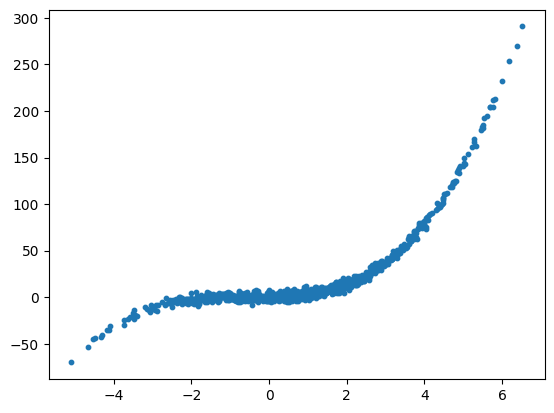

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x, y, s=10)
plt.show()

# Split the Dataset into 3 sets

In [ ]:
# split to train and test then split train to train and validation
from sklearn.model_selection import train_test_split

x = x[:, np.newaxis]
y = y[:, np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

# Train a Simple  Linear Regression Model

In [ ]:
# Degree 1
from sklearn.linear_model import LinearRegression

lin_reg_1 = LinearRegression()
lin_reg_1.fit(x_train, y_train)
# training data to train

# Find r2 score to check model suitability
print("Degree 1 = Training Error : ", lin_reg_1.score(x_train, y_train))
print("Degree 1 = Validation Error : ", lin_reg_1.score(x_val, y_val))


Degree 1 = Training Error :  0.6112766542009314
Degree 1 = Validation Error :  0.578092525888924


- Conclution : Not very suitable model

#Train  Polynomial Regression Models

In [ ]:
# Feature Preperation - PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
poly_regr = PolynomialFeatures(degree = 2) # what degree
x_poly2 = poly_regr.fit_transform(x_train) # transform x

# Same regression model with transformed feture
lin_reg_2 = LinearRegression() # model
lin_reg_2.fit(x_poly2, y_train) # train

LinearRegression()

In [ ]:
x_poly_val2 = poly_regr.fit_transform(x_val)
print("Degree 2 = Training Error : ", lin_reg_2.score(x_poly2, y_train))
print("Degree 2 = Validation Error : ", lin_reg_2.score(x_poly_val2, y_val))

Degree 2 = Training Error :  0.8901821639950546
Degree 2 = Validation Error :  0.8567139925783426


- Conclusion the performance has improved

In [ ]:
# Degree 3
poly_regr = PolynomialFeatures(degree = 3)
x_poly3 = poly_regr.fit_transform(x_train)

lin_reg_3 = LinearRegression()
lin_reg_3.fit(x_poly3, y_train)

LinearRegression()

In [ ]:
x_poly_val3 = poly_regr.fit_transform(x_val)
print("Degree 3 = Training Error : ", lin_reg_3.score(x_poly3, y_train))
print("Degree 3 = Validation Error : ", lin_reg_3.score(x_poly_val3, y_val))

Degree 3 = Training Error :  0.9941068693023871
Degree 3 = Validation Error :  0.9941018868235563


- Conclusion the performance has been further improved

In [ ]:
# Can loop and increase the degree
poly_regr = PolynomialFeatures(degree = 4)
x_poly4 = poly_regr.fit_transform(x_train)

lin_reg_4 = LinearRegression()
lin_reg_4.fit(x_poly4, y_train)

*The process of increasing the hyperparameter where the validation error is minimal -  Hyperparameter tuning*



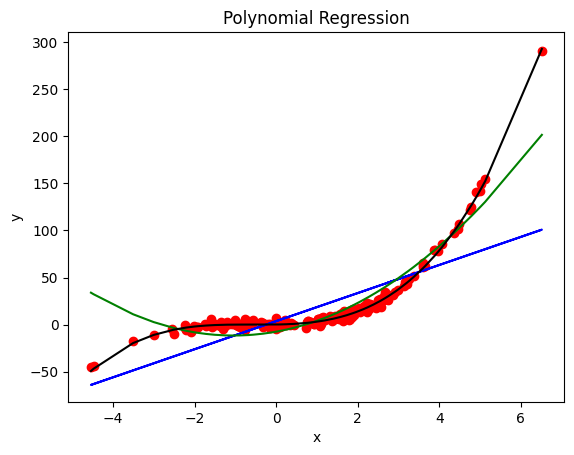

In [ ]:
plt.scatter(x_val, y_val, color = 'red')
plt.plot(x_val, lin_reg_1.predict(x_val), color = 'blue')

x2,y2 = zip(*sorted(zip(x_val, lin_reg_2.predict(x_poly_val2)), key=lambda x: x[0]))
plt.plot(x2, y2, color = 'green')

x3,y3 = zip(*sorted(zip(x_val, lin_reg_3.predict(x_poly_val3)), key=lambda x: x[0]))
plt.plot(x3, y3, color = 'black')

plt.title('Polynomial Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Evaluate the Final Performance

In [ ]:
poly_regr = PolynomialFeatures(degree = 3)
x_poly_test3 = poly_regr.fit_transform(x_test)
lin_reg_3.score(x_poly_test3, y_test)

0.9943846230082006